In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = (pd.read_csv('actor-movie1.tar', header=None, sep = ' ').drop([2], axis=1))
df.head()

,0,1
0,1,1
1,2,1
2,2,2
3,3,1
4,3,3


In [31]:
edges = df.values.tolist()
actors = list(set(df[0].values.tolist()))
movies = list(set(df[1].values.tolist()))

In [32]:
# Build a bipartite graph:

B = nx.Graph()
B.add_nodes_from(actors, bipartite=0) # Add the node attribute “bipartite”
B.add_nodes_from(movies, bipartite=1)
B.add_edges_from(edges)

In [33]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 591
Number of edges: 742
Average degree:   2.5110


In [ ]:
nx.is_connected(B)

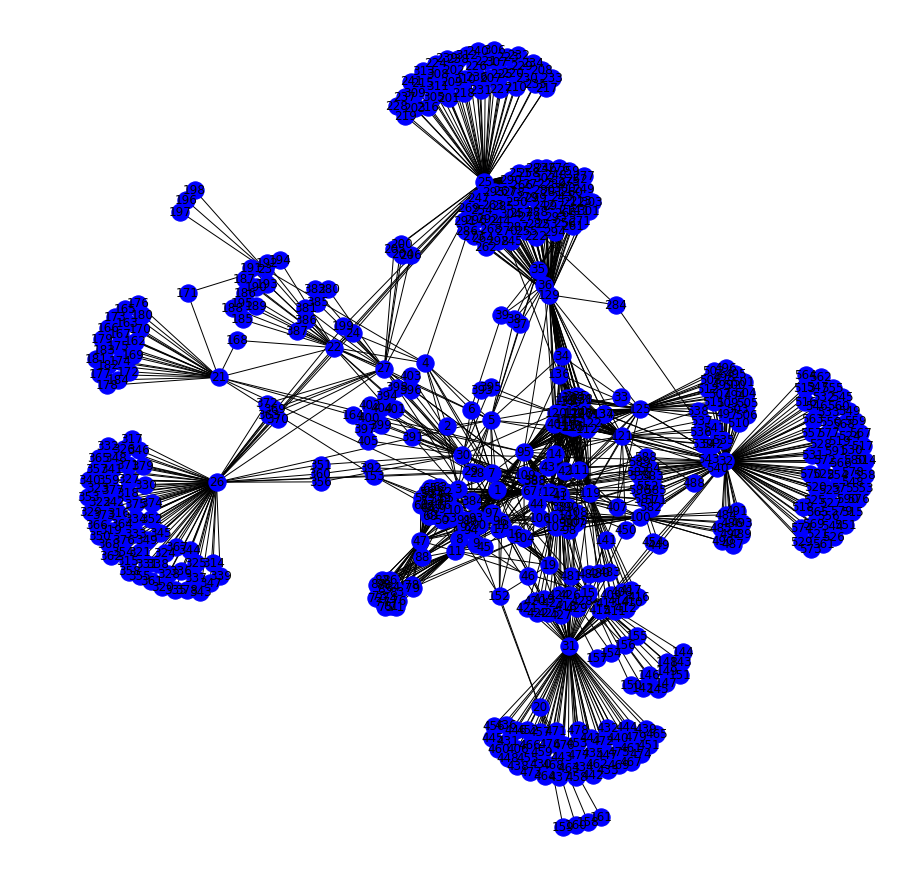

In [41]:
# Project one side of the graph:
plt.figure(figsize = (12,12))
G = nx.projected_graph(B, actors)
nx.draw(G,
pos=nx.spring_layout(G),
with_labels = True,
node_color = 'blue')

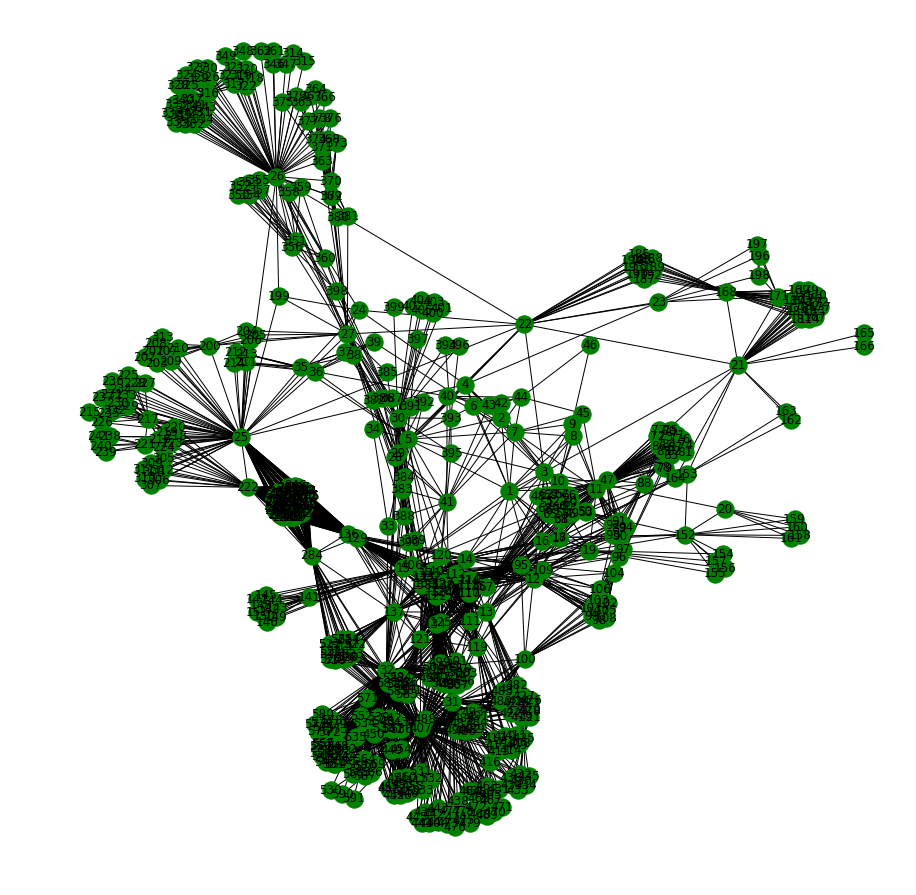

In [40]:
plt.figure(figsize = (12,12))
H = nx.projected_graph(B, movies)
nx.draw(G,
pos=nx.spring_layout(H),
with_labels = True,
node_color = 'g')

In [ ]:
## to modify
def trim_edges(df, weight=1):
    df2 = nx.Graph()
    for f, to, edata in df.edges(data=True):
        if edata['weight']> weight:
            fb_g2.add_edge(f,to,edata)
    return fb_g2

In [ ]:

#To modify
#This function will return a list of graph objects, each corresponding to a specific water level.
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)